                        Open     High      Low    Close  Volume       SMA  \
timestamp                                                                   
2024-02-02 00:34:00  1.08791  1.08791  1.08788  1.08788       0  1.087654   
2024-02-02 00:35:00  1.08787  1.08788  1.08779  1.08779       0  1.087676   
2024-02-02 00:36:00  1.08780  1.08792  1.08779  1.08792       0  1.087704   
2024-02-02 00:37:00  1.08792  1.08801  1.08791  1.08800       0  1.087727   
2024-02-02 00:38:00  1.08799  1.08801  1.08795  1.08796       0  1.087751   

                          EMA        RSI  Bollinger_High  Bollinger_Mid  \
timestamp                                                                 
2024-02-02 00:34:00  1.087675  74.179824        1.087956       1.087654   
2024-02-02 00:35:00  1.087686  63.821906        1.087949       1.087676   
2024-02-02 00:36:00  1.087709  70.277760        1.087958       1.087704   
2024-02-02 00:37:00  1.087736  73.421003        1.087999       1.087727   
2024-02-02

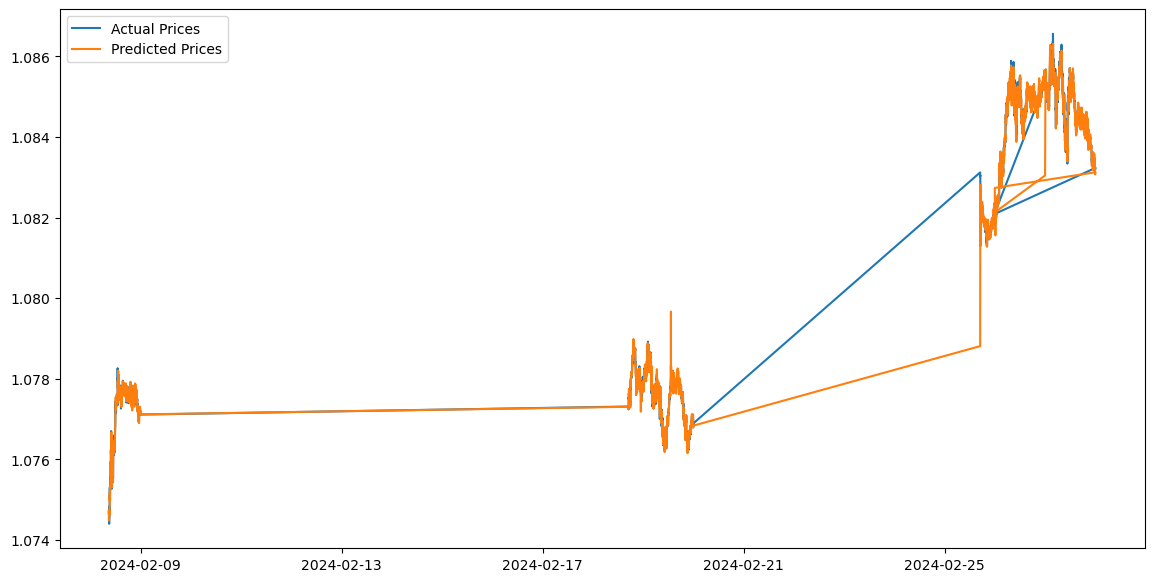

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import talib
# Bước 1: Tiền xử lý dữ liệu
# Đọc dữ liệu
file_path = r'D:\startup\fx\download\EU\DAT_MT_EURUSD_M1_202402.csv'
data = pd.read_csv(file_path)
# Đổi tên cột
data.columns = ['ngay', 'gio', 'Open', 'High', 'Low', 'Close', 'Volume']
# Kết hợp hai cột ngày và giờ
data['timestamp'] = pd.to_datetime(data['ngay'] + ' ' + data['gio'])
# Xóa hai cột ngay và gio ban đầu
data.drop(columns=['ngay', 'gio'], inplace=True)
# Đặt cột timestamp làm index
data.set_index('timestamp', inplace=True)

# Bước 2: Tính toán các chỉ báo kỹ thuật
data['SMA'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA'] = talib.EMA(data['Close'], timeperiod=20)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['Bollinger_High'], data['Bollinger_Mid'], data['Bollinger_Low'] = talib.BBANDS(data['Close'], timeperiod=20)
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Xóa các hàng có giá trị NaN
data = data.dropna()

# Khám phá dữ liệu
print(data.head())
print(data.describe())
# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['SMA', 'EMA', 'RSI', 'Bollinger_High', 'Bollinger_Low', 'MACD']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Bước 4: Xây dựng và huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Bước 5: Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hiển thị kết quả dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.legend()
plt.show()





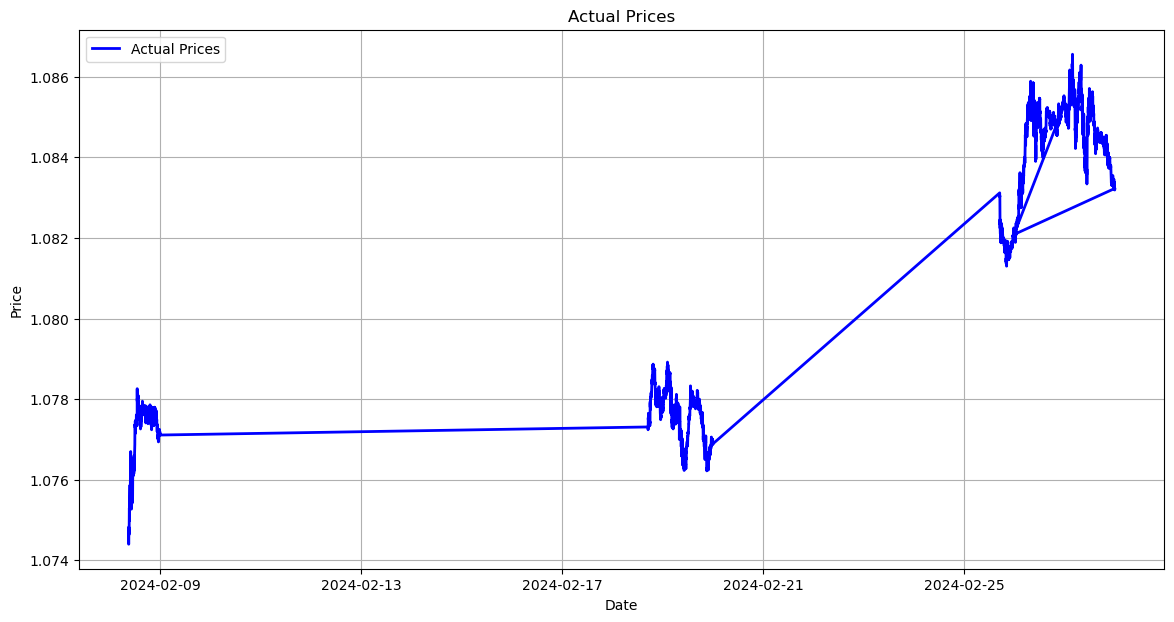

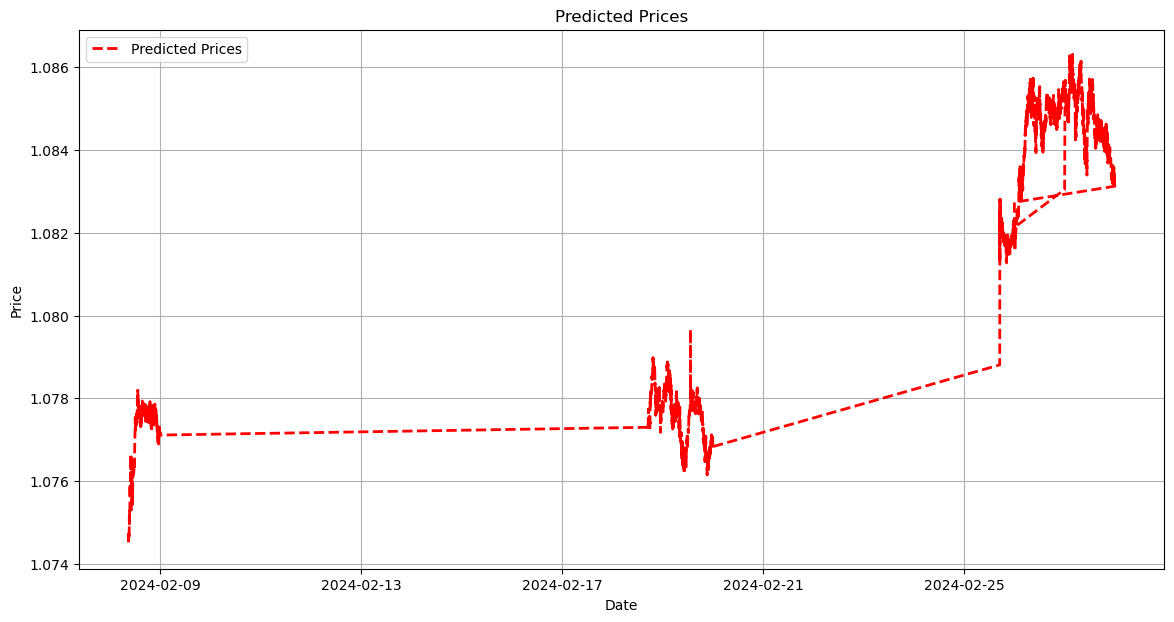

In [6]:
# Biểu đồ giá thực tế
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ giá dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print(X_train.shape)
y_train.shape

(24085, 6)


(24085,)

In [12]:
# Bước 5: Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
oob_accuracy = model.oob_score_

Mean Squared Error: 1.3342838686485284e-08


AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

In [24]:
file_path = r'D:\startup\fx\download\EU\DAT_MT_EURUSD_M1_202402.csv'
data = pd.read_csv(file_path)
# Đổi tên cột
data.columns = ['ngay', 'gio', 'Open', 'High', 'Low', 'Close', 'Volume']
# Kết hợp hai cột ngày và giờ
data['timestamp'] = pd.to_datetime(data['ngay'] + ' ' + data['gio'])
# Xóa hai cột ngay và gio ban đầu
data.drop(columns=['ngay', 'gio'], inplace=True)
data.set_index('timestamp', inplace=True)
print(data)

                        Open     High      Low    Close  Volume
timestamp                                                      
2024-02-02 00:01:00  1.08726  1.08729  1.08723  1.08727       0
2024-02-02 00:02:00  1.08727  1.08729  1.08724  1.08727       0
2024-02-02 00:03:00  1.08728  1.08732  1.08727  1.08729       0
2024-02-02 00:04:00  1.08729  1.08736  1.08729  1.08734       0
2024-02-02 00:05:00  1.08734  1.08746  1.08734  1.08743       0
...                      ...      ...      ...      ...     ...
2024-02-26 23:54:00  1.08529  1.08529  1.08529  1.08529       0
2024-02-26 23:55:00  1.08529  1.08529  1.08529  1.08529       0
2024-02-26 23:56:00  1.08530  1.08531  1.08529  1.08529       0
2024-02-26 23:57:00  1.08529  1.08533  1.08529  1.08533       0
2024-02-26 23:58:00  1.08532  1.08534  1.08530  1.08534       0

[30140 rows x 5 columns]
